# Correlation Coefficients: Pearson's Correlation

Pearson's correlation coefficient (denoted as $r$) is a measure of the linear correlation between two variables, giving a value between -1 and 1 inclusive. It reflects the extent to which two variables change together. If the relationship between the variables is not linear, Pearson's correlation coefficient may not accurately represent the strength of the relationship.

#### Mathematical Formula and Approach

The Pearson correlation coefficient is calculated as follows:

$$
r = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum (X_i - \bar{X})^2}\sqrt{\sum (Y_i - \bar{Y})^2}}
$$

where:
- $X_i$ and $Y_i$ are the individual sample points indexed with $i$,
- $\bar{X}$ and $\bar{Y}$ are the means of the $X$ and $Y$ variables respectively.

#### Steps for Calculating Pearson's Correlation

1. **Compute the Means** of both variables.
2. **Calculate the Numerator:** the sum of the products of the deviations of each pair of values from their respective means.
3. **Calculate the Denominator:** the product of the standard deviations of the two variables.
4. **Divide the Numerator by the Denominator** to get $r$.

#### Assumptions

- **Linearity:** The relationship between the variables is linear.
- **Homoscedasticity:** The variance of one variable is constant across all values of the other.
- **Interval or Ratio Scale:** Both variables should be measured on either interval or ratio scales.
- **Independence:** Pairs of observations are independent.

#### Business Scenario: Semiconductor Manufacturing Process Optimization

#### Scenario Description

A semiconductor manufacturing company is investigating the relationship between the time taken to manufacture a batch of semiconductor chips (`process_time`) and the total energy consumption (`energy_consumption`) for the batch. Understanding the correlation between these variables could help the company optimize its energy usage and improve process efficiency.

#### Business Problem

The company wants to verify if there's a linear association between the process time and the energy consumed. A significant positive correlation would suggest that longer processes tend to consume more energy, while a significant negative correlation might indicate inefficiencies in longer processes.

#### Generate Relevant Data

Let's simulate some data to reflect the described scenario:


In [18]:
import numpy as np

np.random.seed(42)
n = 10000
process_time = np.random.normal(50, 10, n)  # Process time in hours
energy_consumption = process_time * 10 + np.random.normal(0, 5, n)  # Energy in kWh

# Simulate dataset
data = {
    'batch_id': range(n),
    'temperature': np.random.normal(200, 10, n),  # Average temperature in Celsius
    'pressure': np.random.normal(5, 1, n),  # Average pressure in atmospheres
    'humidity': np.random.uniform(30, 70, n),  # Average humidity in percentage
    'material_quality': np.random.randint(1, 11, n),  # Quality of materials on a scale from 1 to 10
    'process_time' : process_time,  # Process time in hours
    'machine_age': np.random.randint(1, 10, n),  # Age of the machine in years
    'yield_rate': np.random.uniform(80, 100, n),  # Yield rate in percentage
    'defect_rate': 100 - np.random.uniform(80, 100, n),  # Defect rate in percentage
    'energy_consumption' : energy_consumption  # Energy in kWh
}

#### Assumption Checks
1. Linearity and Homoscedasticity  
The below scatter plot shows a strong linear relationship between ProcessTime and EnergyConsumption, with a consistent spread throughout the range of process times, which indicates homoscedasticity.

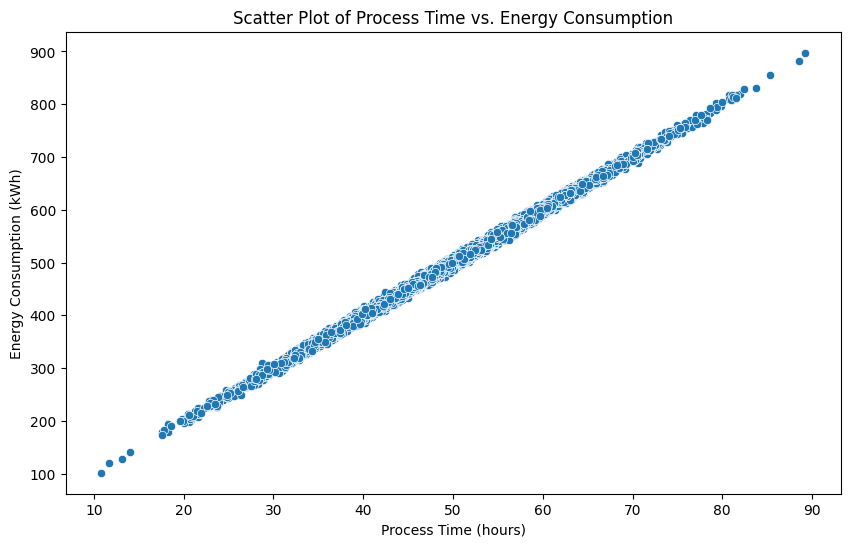

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize relationship and checking linearity and homoscedasticity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='process_time', y='energy_consumption', data=df)
plt.title('Scatter Plot of Process Time vs. Energy Consumption')
plt.xlabel('Process Time (hours)')
plt.ylabel('Energy Consumption (kWh)')
plt.show()


2. Interval or Ratio Scale Variables  
In the provided scenario, variables like Temperature and YieldRate are ratio variables since they have a meaningful zero point and can be measured on a continuous scale.

3. Independence  
The assumption is for the observations to be independent of one another.

- Bonus: Checking Normality of Residuals

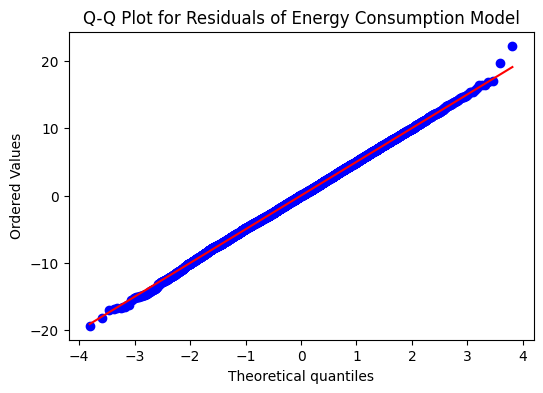

In [17]:
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

# Fit a simple linear regression model for illustration
model = LinearRegression()
model.fit(df[['process_time']], df['energy_consumption'])

# Predict values using the linear model
predicted = model.predict(df[['process_time']])

# Calculate residuals
residuals = df['energy_consumption'] - predicted

# Q-Q plot for residuals
plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot for Residuals of Energy Consumption Model')
plt.show()

#### Perform Pearson's Correlation

In [19]:
import pandas as pd
from scipy.stats import pearsonr

df = pd.DataFrame(data)

# Calculate Pearson's correlation
corr, p_value = pearsonr(df['process_time'], df['energy_consumption'])

print(f"{corr:.4f}, {p_value:.4f}")

0.9988, 0.0000


#### Interpretation

- The Pearson's correlation coefficient is approximately 0.999, which is very close to 1. This indicates a very strong positive linear relationship between the two variables.
- The p-value is 0.0, which suggests that the correlation is statistically significant.

In the context of the semiconductor manufacturing company, this strong positive correlation suggests that the process time is highly predictive of energy consumption. This implies that efforts to reduce process time could lead to proportional reductions in energy consumption, leading to more energy-efficient manufacturing processes.

Given the strength and significance of this relationship, the company can prioritize process time optimization in their efforts to improve overall efficiency. It also indicates that process time is a useful metric for estimating and managing energy costs in semiconductor production.

# Correlation Coefficients: Spearman’s Rank Correlation

Spearman’s Rank Correlation Coefficient (denoted as $r_s$) is a non-parametric measure of the monotonicity of the relationship between two variables. Unlike Pearson's correlation, Spearman's correlation does not assume that both variables are normally distributed. It's often used when the data is ordinal or when the relationship between variables is not linear but monotonic.

#### Mathematical Formula and Approach

The Spearman’s Rank Correlation coefficient is calculated as:

$$
r_s = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}
$$

where:
- $d_i$ is the difference between the ranks of corresponding variables,
- $n$ is the number of observations.

#### Steps for Calculating Spearman’s Rank Correlation

1. **Rank the Data:** Assign ranks to the data of both variables, and rank ties by assigning them the average rank.
2. **Calculate the Difference in Ranks:** Find the difference in ranks ($d_i$) for each pair of observations.
3. **Square the Differences:** Compute the square of each difference ($d_i^2$).
4. **Sum the Squared Differences:** Add up all the squared differences.
5. **Insert the Sum into the Formula:** Calculate $r_s$ using the formula provided above.

#### Assumptions

- The variables are either ordinal, interval, or ratio measurements.
- The variables are not required to be normally distributed.
- The relationship between variables is monotonic, whether linear or not.

#### Business Scenario: Manufacturing Process Effectiveness

#### Scenario Description

A semiconductor manufacturing company is investigating the effectiveness of their production process by examining the relationship between process variables and the quality of the finished product. They have collected data on various factors such as temperature, pressure, humidity, and material quality, along with the process time and machine age.

#### Business Problem

The company needs to understand the monotonic relationships between process variable material quality and process outcomes yield rate. Identifying significant rank correlations can help in pinpointing which factors have the most impact on production quality, guiding efforts to fine-tune the manufacturing process.

#### Generating Relevant Data

The provided code simulates a dataset with necessary variable, including `material_quality`, which could potentially have a monotonic relationship with `yield_rate`.

#### Generate Data and Perform Spearman’s Rank Correlation

To understand the relationship between `material_quality` and `yield_rate`:


In [22]:
import numpy as np
import pandas as pd
from scipy.stats import spearmanr

np.random.seed(42)
n = 10000
process_time = np.random.normal(50, 10, n)  # Process time in hours
energy_consumption = process_time * 10 + np.random.normal(0, 5, n)  # Energy in kWh

# Simulate dataset
data = {
    'batch_id': range(n),
    'temperature': np.random.normal(200, 10, n),  # Average temperature in Celsius
    'pressure': np.random.normal(5, 1, n),  # Average pressure in atmospheres
    'humidity': np.random.uniform(30, 70, n),  # Average humidity in percentage
    'material_quality': np.random.randint(1, 11, n),  # Quality of materials on a scale from 1 to 10
    'process_time' : process_time,  # Process time in hours
    'machine_age': np.random.randint(1, 10, n),  # Age of the machine in years
    'yield_rate': np.random.uniform(80, 100, n),  # Yield rate in percentage
    'defect_rate': 100 - np.random.uniform(80, 100, n),  # Defect rate in percentage
    'energy_consumption' : energy_consumption  # Energy in kWh
}
df = pd.DataFrame(data)

# Calculating Spearman's rank correlation
rank_corr, p_value = spearmanr(df['material_quality'], df['yield_rate'])

print(f"{rank_corr:.4f}, {p_value:.4f}")

-0.0148, 0.1384


#### Interpretation of Spearman’s Rank Correlation Results

Given the Spearman’s rank correlation coefficient of -0.0148 and a p-value of 0.1384 from analyzing the relationship between `material_quality` and `yield_rate`:

- The `rank_corr` value of -0.0148 is very close to zero, indicating a very weak negative monotonic relationship between material quality and yield rate in the manufacturing process. This suggests that there is almost no tendency for batches made with higher quality materials to have either higher or lower yield rates.

- The `p_value` of 0.1384 is above the conventional alpha level of 0.05, which implies that the observed correlation (or a stronger one) could occur by random chance with a relatively high probability. Therefore, we fail to reject the null hypothesis and conclude that there is no statistically significant monotonic relationship between material quality and yield rate based on the provided data.

#### Conclusion for Semiconductor Manufacturing Scenario

For the manufacturing company, the lack of a significant Spearman’s rank correlation means that within the range of material quality and manufacturing conditions represented in the dataset, material quality alone does not appear to be a strong predictor of the yield rate. The company may need to consider other factors or interactions between factors to improve the yield rate. This might involve looking into more detailed aspects of material properties, other process variables, or even the combination of material quality with other factors like machine age or process time.

The analysis suggests that focusing solely on improving material quality without considering other variables may not lead to substantial improvements in the yield rate. Further analysis, possibly including other statistical methods, would be beneficial to understand the complex dynamics of the manufacturing process.